# Graded Challenge 2

`Muhamad Natual Hisak`

## Description

### Objective

```txt
1. Mampu memperoleh data menggunakan BigQuery
2. Mampu melakukan pemrosesan data sebelum melakukan perhitungan
3. Mampu menerapkan konsep statistics descriptive dan inferential pada suatu permasalahan
4. Mampu memahami konsep statistics descriptive dan inferential
```

### Problem Statement
```
Kamu adalah anggota tim Data Science di Austin Smart City dan sedang mengerjakan projek analisa sistem pembuangan dan pengelolaan sampah di kota tersebut. Sebagai anggota tim, berdasarkan data yang tersedia, coba analisa data tersebut menggunakan statistik deskriptif dan inferensial, serta berikan insight kepada pemerintah kota Austin mengenai kondisi sistem pembuangan dan pengelolaan sampah. Gunakan guideline/langkah berikut untuk mempermudah kamu dalam menganalisa.
```
# Problem 1 (Stats)
```
1. Sebelum melakukan perhitungan dan analisa statistik, lakukan pembersihan data terlebih dahulu. Pastikan tidak ada missing value, dsb.

2. Selanjutnya, lakukan eksplorasi data sederhana guna mengetahui dan mengenali data yang kamu punya. Kamu bisa lakukan hal-hal berikut untuk mengeksplorasi data kamu.

3. Melihat rentang waktu pengambilan data
    a. Ada apa saja tipe load sampah di kota Austin berdasarkan data
    b. Mengetahui tempat pembuangan sampah ada dimana saja
    c. dsb

4. Berdasarkan central tendency (mean, median, dan modus) untuk masing-masing site, insight/informasi apa yang bisa kamu sampaikan kepada pemerintah kota? (Caution: Jangan gunakan pd.DataFrame.describe())

5. Pilih site yang paling menarik perhatian kamu, dan berikan alasannya.

6. Gunakan site yang kamu pilih untuk dicek apakah data load_weight ada outlier atau tidak. Gunakan teknik yang tepat sesuai dengan distribusi dari datanya!. Jika iya, berapa persen jumlah outliernya? dan bandingkan central tendency data yang telah dikeluarkan outliernya dengan yang belum (hasil dari perhitungan nomor 3).

7. Gunakan site yang telah kamu pilih untuk dihitung range, variance, dan standar deviasi untuk data load_weight. Berikan insight dari hasil perhitunganmu kepada pemerintah kota (Pastikan data yang digunakan adalah data yang sudah dibersihkan dari outlier).

8. Pemerintah kota berencana menambah site baru. Berikan analisa dan saran terkait berapa kapasitas penampungan di site baru berdasarkan perhitungan confidence interval. Data apa yang kamu gunakan, apakah hanya dari satu site saja atau dari keseluruhan site?

9. Buatlah analisa uji hipotesis dari data tersebut dari data yang tersedia (kasusnya dibebaskan). Definisikan H0 dan H1 nya serta lakukan perhitungan menggunakan t-test yang sesuai dengan hipotesis kamu. Tulis kesimpulan dari hasil perhitunganmu kepada pemerintah kota (Ingat! pemerintah kota tidak mengerti p-value, hipotesis diterima/tidak diterima, jadi gunakan bahasa yang lebih manusiawi!).

Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7 ?
3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?
```


# Problem 2 (Math/Calculus)
```
Pada permasalahan yang sama, pemerintah ingin tau berapa banyak load sampah dalam kg di kota Austin di hari berikutnya (10 Juli 2021). Dalam hal ini, pemerintah menginginkan kamu melakukan forecasting untuk memprediksi nilai di masa depan. Ada banyak teknik forecasting yang bisa dilakukan tapi kamu tidak perlu khawatir, kita akan menggunakan yang metode yang sangat sederhana yaitu menggunakan rumus kecepatan.


Dimana v akan dihitung nilainya menggunakan turunan pertama dari data load_weight yang sebelumnya harus di-group-by berdasarkan report_date dan jangan lupa setelah itu report_date harus diurutkan dari tanggal terkecil hingga terbesar. Δt bernilai 1 karena hanya ingin memprediksi nilai di satu hari kedepan.

Catatan tambahan: Untuk menghitung turunan, harus ditentukan terlebih dahulu sumbu x dan y nya. Jadikan load_weight sebagai sumbu y dan untuk sumbu x, dapat gunakan index dataframe hasil groupby jika indeksnya berupa nomor urut dari 0 hingga N-1. Jika tidak, bisa buat menggunakan range().

Gunakan hasil turunan pertama pada baris terakhir dari data untuk digunakan sebagai v.

Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!
3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?
```

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

Query untuk mengambil dataset dari bigquery

```SELECT report_date,load_time, load_type, load_weight, dropoff_site from bigquery-public-data.austin_waste.waste_and_diversion where report_date >= "2021-01-01" AND report_date <= '2021-12-31' ORDER BY report_date asc```

Import library yang akan digunakan yaitu pandas, numpy, matplotlib.pyplot, dan sympy

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import sympy as sy
import seaborn as sns

# Load Dataset

Load dataset dengan fungsi pd.read.csv("path")

In [2]:
df = pd.read_csv(r"C:\Users\Omen\Desktop\Hacktiv8\Graded Challenge 2\h8dsft_P0GC2_Muhamad_Natual_Hisak.csv")
df #tampilkan tabel

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


Tampilkan 5 data teratas

In [3]:
df.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF


Tampilkan 5 data terbawah

In [4]:
df.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


# 1. Data Cleaning

Copy dataframe ke variabel baru agar data asli tidak ter overwrite saat melakukan data cleaning

In [5]:
dfn = df.copy()
dfn

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


Mencari missing value pada tabel

In [6]:
dfn.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26157 entries, 0 to 26156
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   26157 non-null  object 
 1   load_time     26157 non-null  object 
 2   load_type     26157 non-null  object 
 3   load_weight   25109 non-null  float64
 4   dropoff_site  26157 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1021.9+ KB


C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


Bisa dilihat bahwa ada missing value pada kolom load_weight

plotting data dengan histogram

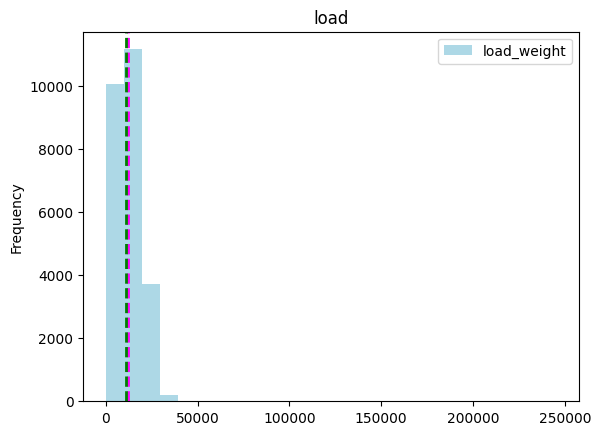

In [7]:
dfn.plot.hist(title='load', color='lightblue', bins=25)  
plt.axvline(df["load_weight"].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df["load_weight"].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Garis putus-putus berwarna hijau menandakan median data<br>
Garis putus-putus berwarna Ungu menandakan mean data

Mencari nilai skew dari dataset

In [8]:
dfn.skew()

C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


load_weight    3.335938
dtype: float64

Skew pada kolom load_weight bernilai 3.335 yang berarti penyebarannya tidak normal. Hal ini menjadi acuan untuk mengisi missing value dengan nilai median

mencari median kolom load_weight

In [9]:
median = dfn['load_weight'].median()
median

11300.0

Mengisi missing value dengan nilai median yang sudah didapatkan

In [10]:
dfn = dfn.fillna(median)

Munculkan tabel yang sudah bersih dari missing value dan siap digunakan.

In [11]:
dfn

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


Plot data setelah mengisi missing value

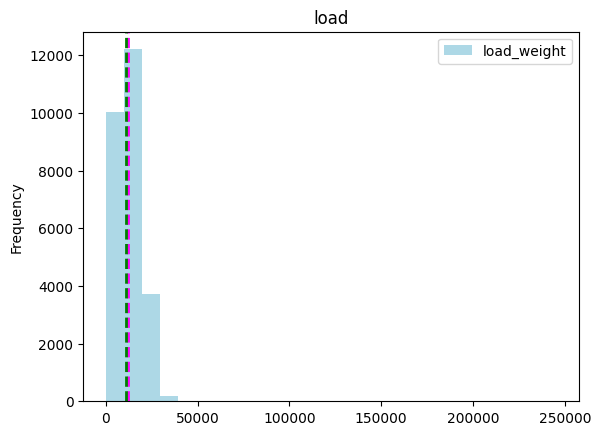

In [12]:
dfn.plot.hist(title='load', color='lightblue', bins=25)  
plt.axvline(df["load_weight"].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df["load_weight"].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Cek nilai skew nya

In [13]:
dfn.skew()

C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


load_weight    3.417228
dtype: float64

Nilai skew > 1 berarti outlier dicari dengan extreme value analysis IQR

Tampilkan boxplot

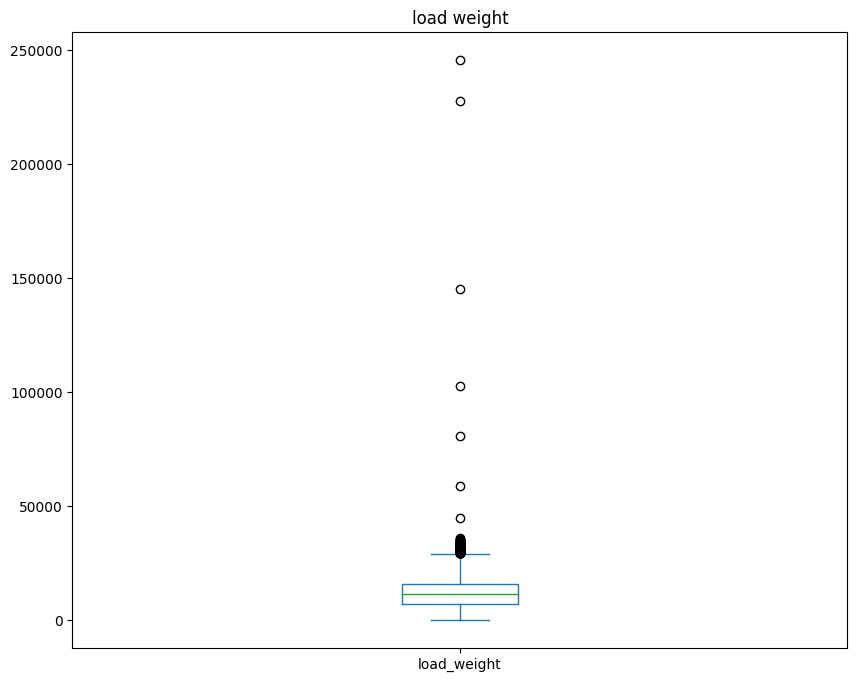

In [14]:
dfn['load_weight'].plot(kind='box', title='load weight', figsize=(10,8))
plt.show()

Cari nilai Q1 dan Q3 untuk menghitung IQR

In [15]:
Q1 = dfn['load_weight'].quantile(0.25)
Q3 = dfn['load_weight'].quantile(0.75)
Q1, Q3

(7280.0, 16060.0)

Mendapatkan nilai IQR

In [16]:
IQR = Q3 - Q1
IQR

8780.0

Tentukan nilai limit atas dan bawah

In [17]:
lower_limit = Q1 - 3*IQR
upper_limit = Q3 + 3*IQR
lower_limit, upper_limit

(-19060.0, 42400.0)

Tampilkan data yang termasuk outlier

In [18]:
out1 = dfn[(dfn['load_weight']>upper_limit) | (dfn['load_weight']<lower_limit)]
out1 

,report_date,load_time,load_type,load_weight,dropoff_site
836,2021-01-07,2021-01-07 02:45:00 UTC,GARBAGE COLLECTIONS,44980.0,TDS LANDFILL
5176,2021-02-09,2021-02-09 01:08:00 UTC,GARBAGE COLLECTIONS,102680.0,TDS LANDFILL
8680,2021-03-09,2021-03-09 01:30:00 UTC,GARBAGE COLLECTIONS,145160.0,TDS LANDFILL
12021,2021-03-29,2021-03-29 05:08:00 UTC,GARBAGE COLLECTIONS,58600.0,TDS LANDFILL
20368,2021-05-26,2021-05-26 11:40:00 UTC,GARBAGE COLLECTIONS,80697.0,TDS LANDFILL
20553,2021-05-27,2021-05-27 11:33:00 UTC,GARBAGE COLLECTIONS,245540.0,TDS LANDFILL
23798,2021-06-21,2021-06-21 01:05:00 UTC,GARBAGE COLLECTIONS,227780.0,TDS LANDFILL


Tampilkan informasi terkait data yang termasuk outlier

In [19]:
out1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 836 to 23798
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   report_date   7 non-null      object 
 1   load_time     7 non-null      object 
 2   load_type     7 non-null      object 
 3   load_weight   7 non-null      float64
 4   dropoff_site  7 non-null      object 
dtypes: float64(1), object(4)
memory usage: 336.0+ bytes


C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


Ada 7 buah data yang termasuk dalam outlier

Hapus outlier dari tabel 

In [20]:
dfc = dfn[(dfn.load_weight<upper_limit) & (dfn.load_weight>lower_limit)] 
dfc

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,11300.0,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF
...,...,...,...,...,...
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


tampilkan boxplot tabel setelah dibersihkan dari outlier

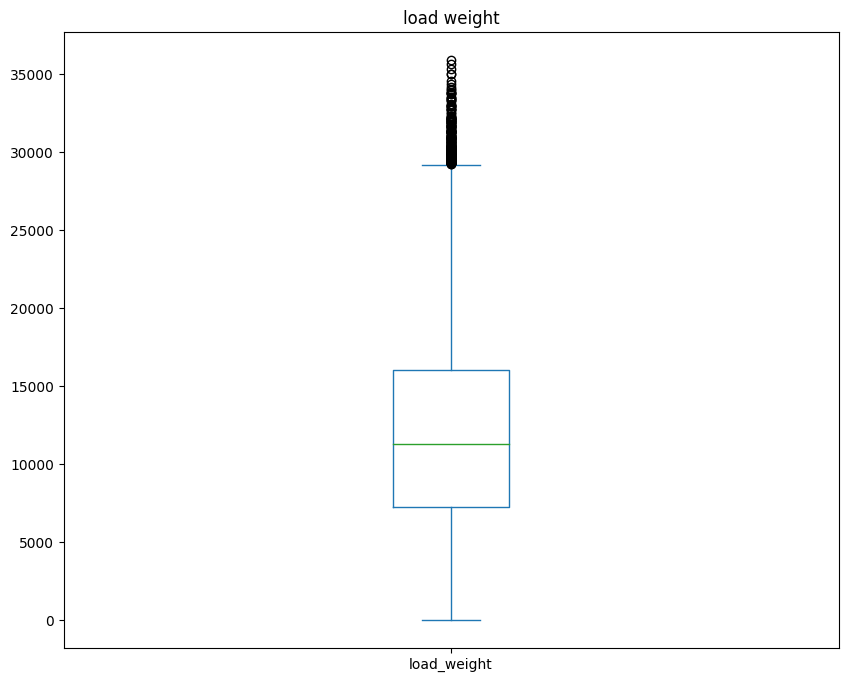

In [21]:
dfc['load_weight'].plot(kind='box', title='load weight', figsize=(10,8))
plt.show()

Plot data yang sudah dibersihkan dan siap digunakan

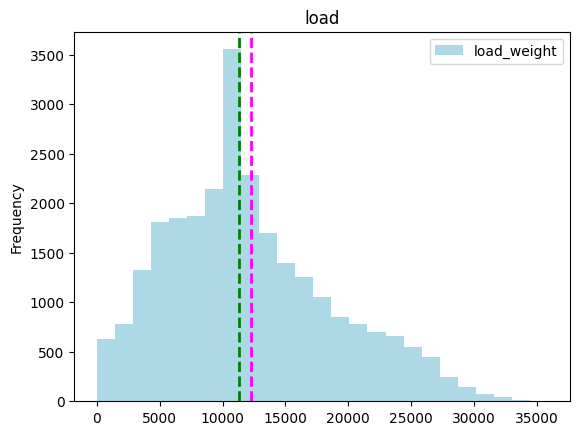

In [22]:
dfc.plot.hist(title='load', color='lightblue', bins=25)  
plt.axvline(df["load_weight"].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df["load_weight"].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

# 2. Data Exploration

Mencari tanggal awal pengambilan data dan akhir pengambilan data dengan menggunakan fungsi min dan max pada kolom report_date

In [23]:
dfc["report_date"].min() 

'2021-01-01'

Data pertama diambil pada tanggal 1 Januari 2021

In [24]:
dfc["report_date"].max()

'2021-07-09'

Data Terbaru diambil pada tanggal 9 Juli 2021

Mencari  tipe load yang ada pada data dengan meninjau unique value pada kolom load_type

In [25]:
dfc["load_type"].nunique()

14

Ada 14 tipe load yang berbeda pada data ini.<br>
Selanjutnya melihat apa saja 14 tipe tersebut

In [26]:
dfc["load_type"].unique()

array(['SWEEPING', 'TIRES', 'RECYCLING - SINGLE STREAM', 'YARD TRIMMING',
       'BULK', 'DEAD ANIMAL', 'GARBAGE COLLECTIONS', 'MIXED LITTER',
       'ORGANICS', 'BRUSH', 'RECYCLED METAL', 'LITTER',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

Mencari  jumlah site yang ada pada data dengan meninjau unique value pada kolom dropoff_site

In [27]:
dfc["dropoff_site"].nunique()

18

Ada 18 site yang ada pada data ini.<br>
Selanjutnya melihat nama site yang terdaftar pada tabel ini

In [28]:
dfc["dropoff_site"].unique()

array(['ONION CREEK', 'MRF', 'TDS - MRF', 'HORNSBY BEND', 'TDS LANDFILL',
       'ORGANICS BY GOSH', 'BALCONES RECYCLING', 'AUSTIN IRON AND METAL',
       'PARK CENTER', 'ON ROUTE HIGH DUMP', 'WILCAB', 'GREAT NORTHERN',
       'AUSTIN WOOD RECYCLING', 'PARK BEND', 'BALCONES WOODS',
       'STEINER LANDFILL', 'WESTFIELD', 'ST. EDWARDS'], dtype=object)

Selanjutnya mencari tahu jumlah report yang dilakukan pada setiap site

In [29]:
site = dfc["dropoff_site"].unique().tolist() #jadikan value dalam kolom dropoff_site menjadi list
site

['ONION CREEK',
 'MRF',
 'TDS - MRF',
 'HORNSBY BEND',
 'TDS LANDFILL',
 'ORGANICS BY GOSH',
 'BALCONES RECYCLING',
 'AUSTIN IRON AND METAL',
 'PARK CENTER',
 'ON ROUTE HIGH DUMP',
 'WILCAB',
 'GREAT NORTHERN',
 'AUSTIN WOOD RECYCLING',
 'PARK BEND',
 'BALCONES WOODS',
 'STEINER LANDFILL',
 'WESTFIELD',
 'ST. EDWARDS']

In [30]:
for x in site : #loop untuk menghitung jumlah report yang dilakukan pada setiap site
    z = dfc.loc[dfc.dropoff_site == x]
    print(x," :",z.shape[0])
        

ONION CREEK  : 813
MRF  : 168
TDS - MRF  : 2948
HORNSBY BEND  : 1655
TDS LANDFILL  : 10687
ORGANICS BY GOSH  : 5755
BALCONES RECYCLING  : 3837
AUSTIN IRON AND METAL  : 50
PARK CENTER  : 75
ON ROUTE HIGH DUMP  : 81
WILCAB  : 1
GREAT NORTHERN  : 70
AUSTIN WOOD RECYCLING  : 2
PARK BEND  : 4
BALCONES WOODS  : 1
STEINER LANDFILL  : 1
WESTFIELD  : 1
ST. EDWARDS  : 1


In [31]:
#Persentase 5 site yang paling sering muncul pada data dibanding keseluruhan data
((10687 + 5755 + 3837 + 1655 + 2948) / 26150)*100

95.151051625239

Dari data diatas, bisa dilihat bahwa ada 5 site yang mencangkup sedikit diatas 95% data yaitu TDS LANDFILL, ORGANICS BY GOSH, BALCONES RECYCLING, TDS - MRF, DAN HORNSBY BEND.

# 3. Central Tendency

Mencari central tendency masing-masing site

Membuat fungsi untuk mencari central tendency site

In [32]:
def SiteCent(x) :
    y = dfc.loc[dfc["dropoff_site"] == x]
    print(x,"with outlier :")
    print ("Mean: ",y["load_weight"].mean())
    print ("Median: ",y["load_weight"].median())
    print ("Mode: ",y["load_weight"].mode())
    print ("Q1: ",y["load_weight"].quantile(.25))
    print ("Q3: ",y["load_weight"].quantile(.75))
    print ("IQR: ",y["load_weight"].quantile(.75)-y["load_weight"].quantile(.25))
    print ("Skew: ",y["load_weight"].skew())
    y.plot.hist(title=x, color='lightblue', bins=25)  
    plt.axvline(y["load_weight"].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(y["load_weight"].median(), color='green', linestyle='dashed', linewidth=2)
    plt.show()
    return y


Membuat fungsi untuk memunculkan central tendency data yang sudah dibersihkan dari outlier

In [33]:
def cleanCent(x, z) :
    y = x.loc[x["dropoff_site"] == z]
    print(z, "clean :")
    print ("Mean: ",y["load_weight"].mean())
    print ("Median: ",y["load_weight"].median())
    print ("Mode: ",y["load_weight"].mode())
    print ("Q1: ",y["load_weight"].quantile(.25))
    print ("Q3: ",y["load_weight"].quantile(.75))
    print ("IQR: ",y["load_weight"].quantile(.75)-y["load_weight"].quantile(.25))
    print ("Skew: ",y["load_weight"].skew())
    k = y.drop(["zscore"], axis=1)
    k.plot.hist(title=z+" clean", color='lightblue', bins=25)  
    plt.axvline(k["load_weight"].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(k["load_weight"].median(), color='green', linestyle='dashed', linewidth=2)
    plt.show()
    return k


In [34]:
def cleanCent0(x, z) :
    y = x.loc[x["dropoff_site"] == z]
    print(z, "clean :")
    print ("Mean: ",y["load_weight"].mean())
    print ("Median: ",y["load_weight"].median())
    print ("Mode: ",y["load_weight"].mode())
    print ("Q1: ",y["load_weight"].quantile(.25))
    print ("Q3: ",y["load_weight"].quantile(.75))
    print ("IQR: ",y["load_weight"].quantile(.75)-y["load_weight"].quantile(.25))
    print ("Skew: ",y["load_weight"].skew())
    #k = y.drop(["zscore"], axis=1)
    y.plot.hist(title=z+" clean", color='lightblue', bins=25)  
    plt.axvline(y["load_weight"].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(y["load_weight"].median(), color='green', linestyle='dashed', linewidth=2)
    plt.show()
    return y

Melihat central tendency site

TDS LANDFILL

TDS LANDFILL with outlier :
Mean:  15093.533783044822
Median:  14920.0
Mode:  0       20.0
1       60.0
2    12020.0
dtype: float64
Q1:  8820.0
Q3:  21640.0
IQR:  12820.0
Skew:  0.018688247000146613


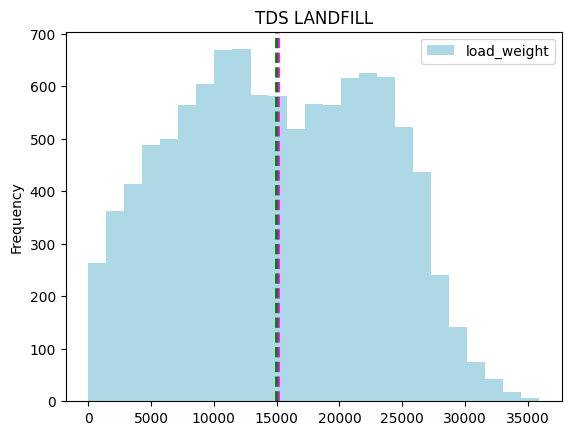

,report_date,load_time,load_type,load_weight,dropoff_site
16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL
17,2021-01-02,2021-01-02 12:25:00 UTC,BULK,10200.0,TDS LANDFILL
18,2021-01-02,2021-01-02 02:13:00 UTC,BULK,5440.0,TDS LANDFILL
19,2021-01-02,2021-01-02 04:27:00 UTC,DEAD ANIMAL,140.0,TDS LANDFILL
20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL
...,...,...,...,...,...
26097,2021-07-08,2021-07-08 02:04:00 UTC,GARBAGE COLLECTIONS,8380.0,TDS LANDFILL
26098,2021-07-08,2021-07-08 02:27:00 UTC,BULK,2100.0,TDS LANDFILL
26099,2021-07-08,2021-07-08 11:07:00 UTC,BULK,3500.0,TDS LANDFILL
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL


In [35]:
SiteCent("TDS LANDFILL")

Karena niali skew yang terdapat pada tabel diatas tidak memenuhi -0,5 < skew < 0,5, maka distribusi data nya bisa disebut normal. Untuk menghandling outlier pada data ini akan digunakan z score

In [36]:
TDS = dfc.loc[dfc["dropoff_site"] == "TDS LANDFILL"]
TDS['zscore'] = ( TDS.load_weight - TDS.load_weight.mean() ) / TDS.load_weight.std()
TDS.head(5)

C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,report_date,load_time,load_type,load_weight,dropoff_site,zscore
16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL,-0.332790
17,2021-01-02,2021-01-02 12:25:00 UTC,BULK,10200.0,TDS LANDFILL,-0.623110
18,2021-01-02,2021-01-02 02:13:00 UTC,BULK,5440.0,TDS LANDFILL,-1.229217
19,2021-01-02,2021-01-02 04:27:00 UTC,DEAD ANIMAL,140.0,TDS LANDFILL,-1.904084
20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL,1.207944


Munculkan outlier

In [37]:
TDS[(TDS.zscore<-3) | (TDS.zscore>3)]

,report_date,load_time,load_type,load_weight,dropoff_site,zscore


Dari data diatas, tidak ada outlier pada tabel ini, tetapi tetap masukkan ke variabel baru

In [38]:
TDSC = TDS[~(TDS.zscore<-3) & ~(TDS.zscore>3)]
TDSC.head()

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL,-0.332790
17,2021-01-02,2021-01-02 12:25:00 UTC,BULK,10200.0,TDS LANDFILL,-0.623110
18,2021-01-02,2021-01-02 02:13:00 UTC,BULK,5440.0,TDS LANDFILL,-1.229217
19,2021-01-02,2021-01-02 04:27:00 UTC,DEAD ANIMAL,140.0,TDS LANDFILL,-1.904084
20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL,1.207944


Munculkan tabel yang sudah bersih dari outlier (sama dengan tabel asli nya karena tidak ada outlier)

In [39]:
TDSC

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
16,2021-01-02,2021-01-02 02:16:00 UTC,BULK,12480.0,TDS LANDFILL,-0.332790
17,2021-01-02,2021-01-02 12:25:00 UTC,BULK,10200.0,TDS LANDFILL,-0.623110
18,2021-01-02,2021-01-02 02:13:00 UTC,BULK,5440.0,TDS LANDFILL,-1.229217
19,2021-01-02,2021-01-02 04:27:00 UTC,DEAD ANIMAL,140.0,TDS LANDFILL,-1.904084
20,2021-01-02,2021-01-02 02:44:00 UTC,GARBAGE COLLECTIONS,24580.0,TDS LANDFILL,1.207944
...,...,...,...,...,...,...
26097,2021-07-08,2021-07-08 02:04:00 UTC,GARBAGE COLLECTIONS,8380.0,TDS LANDFILL,-0.854857
26098,2021-07-08,2021-07-08 02:27:00 UTC,BULK,2100.0,TDS LANDFILL,-1.654510
26099,2021-07-08,2021-07-08 11:07:00 UTC,BULK,3500.0,TDS LANDFILL,-1.476243
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL,-1.679977


Central tendency data akan sama dengan central tendency data asli karena tidak ada data yang dibuang (refer ke grafik di awal)

ORGANICS BY GOSH

Munculkan central tendency untuk site ORGANICS BY GOSH

ORGANICS BY GOSH with outlier :
Mean:  11817.220851433536
Median:  11900.0
Mode:  0    11300.0
dtype: float64
Q1:  8160.0
Q3:  15540.0
IQR:  7380.0
Skew:  0.05937529539509635


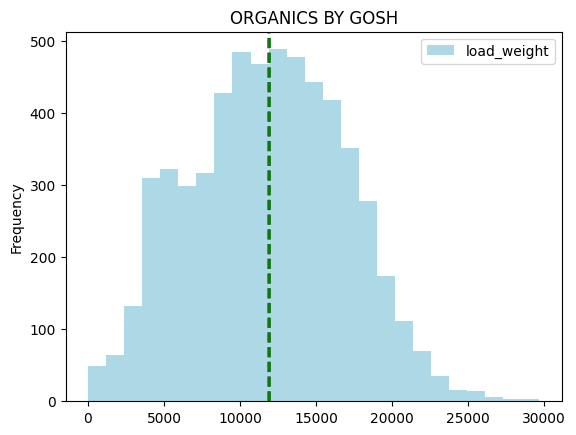

,report_date,load_time,load_type,load_weight,dropoff_site
75,2021-01-02,2021-01-04 07:37:00 UTC,ORGANICS,15800.0,ORGANICS BY GOSH
76,2021-01-02,2021-01-02 07:40:00 UTC,ORGANICS,20760.0,ORGANICS BY GOSH
77,2021-01-02,2021-01-02 04:46:00 UTC,ORGANICS,14450.0,ORGANICS BY GOSH
78,2021-01-02,2021-01-04 08:48:00 UTC,ORGANICS,5980.0,ORGANICS BY GOSH
79,2021-01-02,2021-01-02 01:30:00 UTC,ORGANICS,19540.0,ORGANICS BY GOSH
...,...,...,...,...,...
26125,2021-07-08,2021-07-08 04:39:00 UTC,ORGANICS,13760.0,ORGANICS BY GOSH
26126,2021-07-08,2021-07-08 03:47:00 UTC,ORGANICS,6180.0,ORGANICS BY GOSH
26127,2021-07-08,2021-07-08 03:49:00 UTC,ORGANICS,10140.0,ORGANICS BY GOSH
26128,2021-07-08,2021-07-08 04:24:00 UTC,ORGANICS,10640.0,ORGANICS BY GOSH


In [40]:
SiteCent("ORGANICS BY GOSH")

Karena niali skew yang terdapat pada tabel diatas tidak memenuhi -0,5 < skew < 0,5, maka distribusi data nya bisa disebut normal. Untuk menghandling outlier pada data ini akan digunakan z score

In [41]:
OBG = dfc.loc[dfc["dropoff_site"] == "ORGANICS BY GOSH"]
OBG['zscore'] = ( OBG.load_weight - OBG.load_weight.mean() ) / OBG.load_weight.std()
OBG.head(5)

C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,report_date,load_time,load_type,load_weight,dropoff_site,zscore
75,2021-01-02,2021-01-04 07:37:00 UTC,ORGANICS,15800.0,ORGANICS BY GOSH,0.786387
76,2021-01-02,2021-01-02 07:40:00 UTC,ORGANICS,20760.0,ORGANICS BY GOSH,1.765723
77,2021-01-02,2021-01-02 04:46:00 UTC,ORGANICS,14450.0,ORGANICS BY GOSH,0.519834
78,2021-01-02,2021-01-04 08:48:00 UTC,ORGANICS,5980.0,ORGANICS BY GOSH,-1.152540
79,2021-01-02,2021-01-02 01:30:00 UTC,ORGANICS,19540.0,ORGANICS BY GOSH,1.524838


Munculkan data yang termasuk outlier 

In [42]:
OBG[(OBG.zscore<-3) | (OBG.zscore>3)]

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
6903,2021-02-26,2021-02-26 05:12:00 UTC,ORGANICS,27620.0,ORGANICS BY GOSH,3.120208
7275,2021-03-01,2021-03-01 05:36:00 UTC,ORGANICS,27300.0,ORGANICS BY GOSH,3.057025
9814,2021-03-15,2021-03-15 12:00:00 UTC,ORGANICS,27240.0,ORGANICS BY GOSH,3.045178
21339,2021-06-02,2021-06-02 05:39:00 UTC,ORGANICS,28120.0,ORGANICS BY GOSH,3.218931
21504,2021-06-03,2021-06-03 07:05:00 UTC,ORGANICS,29660.0,ORGANICS BY GOSH,3.522999
21945,2021-06-07,2021-06-07 12:00:00 UTC,ORGANICS,29000.0,ORGANICS BY GOSH,3.392685
22937,2021-06-14,2021-06-14 06:15:00 UTC,ORGANICS,29160.0,ORGANICS BY GOSH,3.424276
23116,2021-06-15,2021-06-15 02:07:00 UTC,ORGANICS,27120.0,ORGANICS BY GOSH,3.021485


Hapus outlier dan masukkan data ke variabel baru

In [43]:
OBGC = OBG[~(OBG.zscore<-3) & ~(OBG.zscore>3)]
OBGC.head()

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
75,2021-01-02,2021-01-04 07:37:00 UTC,ORGANICS,15800.0,ORGANICS BY GOSH,0.786387
76,2021-01-02,2021-01-02 07:40:00 UTC,ORGANICS,20760.0,ORGANICS BY GOSH,1.765723
77,2021-01-02,2021-01-02 04:46:00 UTC,ORGANICS,14450.0,ORGANICS BY GOSH,0.519834
78,2021-01-02,2021-01-04 08:48:00 UTC,ORGANICS,5980.0,ORGANICS BY GOSH,-1.152540
79,2021-01-02,2021-01-02 01:30:00 UTC,ORGANICS,19540.0,ORGANICS BY GOSH,1.524838


In [44]:
OBGC

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
75,2021-01-02,2021-01-04 07:37:00 UTC,ORGANICS,15800.0,ORGANICS BY GOSH,0.786387
76,2021-01-02,2021-01-02 07:40:00 UTC,ORGANICS,20760.0,ORGANICS BY GOSH,1.765723
77,2021-01-02,2021-01-02 04:46:00 UTC,ORGANICS,14450.0,ORGANICS BY GOSH,0.519834
78,2021-01-02,2021-01-04 08:48:00 UTC,ORGANICS,5980.0,ORGANICS BY GOSH,-1.152540
79,2021-01-02,2021-01-02 01:30:00 UTC,ORGANICS,19540.0,ORGANICS BY GOSH,1.524838
...,...,...,...,...,...,...
26125,2021-07-08,2021-07-08 04:39:00 UTC,ORGANICS,13760.0,ORGANICS BY GOSH,0.383595
26126,2021-07-08,2021-07-08 03:47:00 UTC,ORGANICS,6180.0,ORGANICS BY GOSH,-1.113051
26127,2021-07-08,2021-07-08 03:49:00 UTC,ORGANICS,10140.0,ORGANICS BY GOSH,-0.331162
26128,2021-07-08,2021-07-08 04:24:00 UTC,ORGANICS,10640.0,ORGANICS BY GOSH,-0.232438


Munculkan central tendency data awal dan data yang sudah dibersihkan 

ORGANICS BY GOSH with outlier :
Mean:  11817.220851433536
Median:  11900.0
Mode:  0    11300.0
dtype: float64
Q1:  8160.0
Q3:  15540.0
IQR:  7380.0
Skew:  0.05937529539509635


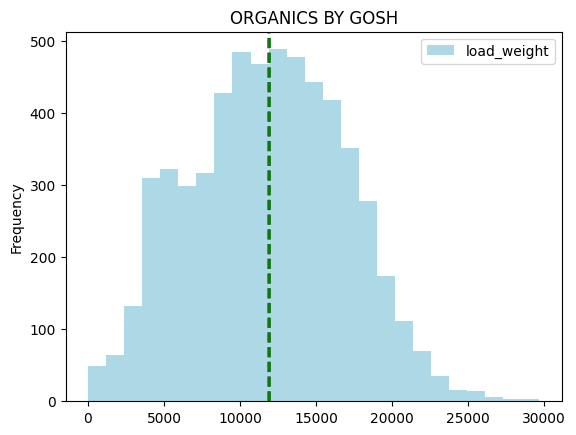

ORGANICS BY GOSH clean :
Mean:  11794.481642596136
Median:  11880.0
Mode:  0    11300.0
dtype: float64
Q1:  8150.0
Q3:  15520.0
IQR:  7370.0
Skew:  0.026079398089428867


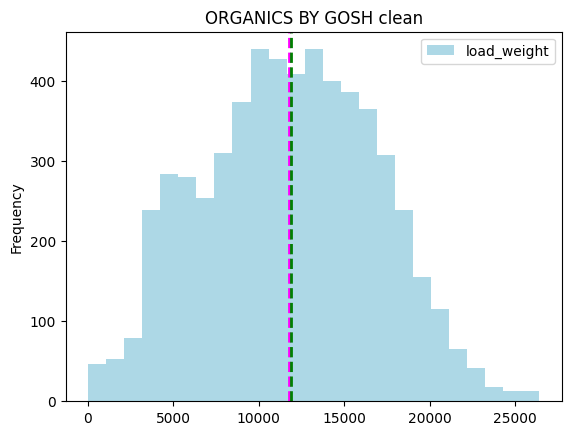

,report_date,load_time,load_type,load_weight,dropoff_site
75,2021-01-02,2021-01-04 07:37:00 UTC,ORGANICS,15800.0,ORGANICS BY GOSH
76,2021-01-02,2021-01-02 07:40:00 UTC,ORGANICS,20760.0,ORGANICS BY GOSH
77,2021-01-02,2021-01-02 04:46:00 UTC,ORGANICS,14450.0,ORGANICS BY GOSH
78,2021-01-02,2021-01-04 08:48:00 UTC,ORGANICS,5980.0,ORGANICS BY GOSH
79,2021-01-02,2021-01-02 01:30:00 UTC,ORGANICS,19540.0,ORGANICS BY GOSH
...,...,...,...,...,...
26125,2021-07-08,2021-07-08 04:39:00 UTC,ORGANICS,13760.0,ORGANICS BY GOSH
26126,2021-07-08,2021-07-08 03:47:00 UTC,ORGANICS,6180.0,ORGANICS BY GOSH
26127,2021-07-08,2021-07-08 03:49:00 UTC,ORGANICS,10140.0,ORGANICS BY GOSH
26128,2021-07-08,2021-07-08 04:24:00 UTC,ORGANICS,10640.0,ORGANICS BY GOSH


In [45]:
SiteCent("ORGANICS BY GOSH")
cleanCent(OBGC, "ORGANICS BY GOSH")

BALCONES RECYCLING

Central Tendency data site BALCONES RECYCLING

BALCONES RECYCLING with outlier :
Mean:  9464.652071931196
Median:  9840.0
Mode:  0    11880.0
dtype: float64
Q1:  6260.0
Q3:  12080.0
IQR:  5820.0
Skew:  0.10148179348246145


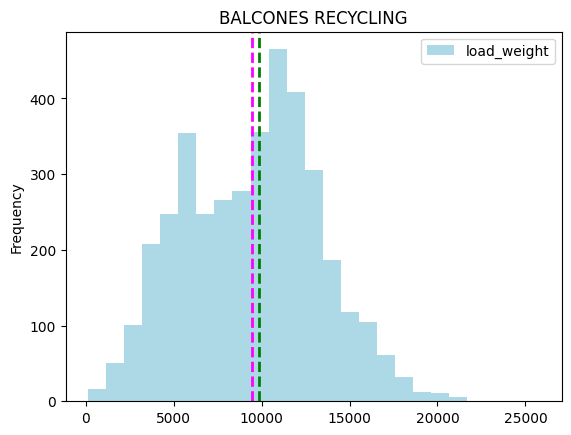

,report_date,load_time,load_type,load_weight,dropoff_site
111,2021-01-02,2021-01-02 12:22:00 UTC,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING
112,2021-01-02,2021-01-02 12:45:00 UTC,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING
113,2021-01-02,2021-01-02 11:55:00 UTC,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING
114,2021-01-02,2021-01-02 11:48:00 UTC,RECYCLING - SINGLE STREAM,4440.0,BALCONES RECYCLING
115,2021-01-02,2021-01-02 09:58:00 UTC,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
...,...,...,...,...,...
26002,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,4540.0,BALCONES RECYCLING
26003,2021-07-07,2021-07-07 10:00:00 UTC,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
26004,2021-07-07,2021-07-07 12:00:00 UTC,RECYCLING - SINGLE STREAM,4740.0,BALCONES RECYCLING
26005,2021-07-07,2021-07-07 09:00:00 UTC,RECYCLING - SINGLE STREAM,9200.0,BALCONES RECYCLING


In [46]:
SiteCent("BALCONES RECYCLING")

Karena niali skew yang terdapat pada tabel diatas tidak memenuhi -0,5 < skew < 0,5, maka distribusi data nya bisa disebut normal. Untuk menghandling outlier pada data ini akan digunakan z score

In [47]:
BR = dfc.loc[dfc["dropoff_site"] == "BALCONES RECYCLING"]
BR['zscore'] = ( BR.load_weight - BR.load_weight.mean() ) / BR.load_weight.std()
BR.head(5)

C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,report_date,load_time,load_type,load_weight,dropoff_site,zscore
111,2021-01-02,2021-01-02 12:22:00 UTC,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING,-0.182446
112,2021-01-02,2021-01-02 12:45:00 UTC,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING,-0.249765
113,2021-01-02,2021-01-02 11:55:00 UTC,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING,-1.150795
114,2021-01-02,2021-01-02 11:48:00 UTC,RECYCLING - SINGLE STREAM,4440.0,BALCONES RECYCLING,-1.300967
115,2021-01-02,2021-01-02 09:58:00 UTC,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING,-0.208338


Munculkan data yang termasuk outlier

In [48]:
BR[(BR.zscore<-3) | (BR.zscore>3)]

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
891,2021-01-07,2021-01-05 02:05:00 UTC,RECYCLING - SINGLE STREAM,21400.0,BALCONES RECYCLING,3.090263
900,2021-01-07,2021-01-07 12:20:00 UTC,RECYCLING - SINGLE STREAM,21400.0,BALCONES RECYCLING,3.090263
18396,2021-05-11,2021-05-11 01:06:00 UTC,RECYCLING - SINGLE STREAM,21060.0,BALCONES RECYCLING,3.002231
18569,2021-05-12,2021-05-12 01:03:00 UTC,RECYCLING - SINGLE STREAM,23240.0,BALCONES RECYCLING,3.566670
20469,2021-05-26,2021-05-26 01:45:00 UTC,RECYCLING - SINGLE STREAM,21470.0,BALCONES RECYCLING,3.108387
22295,2021-06-09,2021-06-09 01:55:00 UTC,RECYCLING - SINGLE STREAM,25780.0,BALCONES RECYCLING,4.224319
22302,2021-06-09,2021-06-09 01:44:00 UTC,RECYCLING - SINGLE STREAM,22480.0,BALCONES RECYCLING,3.369893


Hapus outlier dan masukkan data yang sudah bersih ke variabel baru

In [49]:
BRC = BR[~(BR.zscore<-3) & ~(BR.zscore>3)]
BRC.head()

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
111,2021-01-02,2021-01-02 12:22:00 UTC,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING,-0.182446
112,2021-01-02,2021-01-02 12:45:00 UTC,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING,-0.249765
113,2021-01-02,2021-01-02 11:55:00 UTC,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING,-1.150795
114,2021-01-02,2021-01-02 11:48:00 UTC,RECYCLING - SINGLE STREAM,4440.0,BALCONES RECYCLING,-1.300967
115,2021-01-02,2021-01-02 09:58:00 UTC,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING,-0.208338


In [50]:
BRC

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
111,2021-01-02,2021-01-02 12:22:00 UTC,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING,-0.182446
112,2021-01-02,2021-01-02 12:45:00 UTC,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING,-0.249765
113,2021-01-02,2021-01-02 11:55:00 UTC,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING,-1.150795
114,2021-01-02,2021-01-02 11:48:00 UTC,RECYCLING - SINGLE STREAM,4440.0,BALCONES RECYCLING,-1.300967
115,2021-01-02,2021-01-02 09:58:00 UTC,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING,-0.208338
...,...,...,...,...,...,...
26002,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,4540.0,BALCONES RECYCLING,-1.275075
26003,2021-07-07,2021-07-07 10:00:00 UTC,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING,-0.208338
26004,2021-07-07,2021-07-07 12:00:00 UTC,RECYCLING - SINGLE STREAM,4740.0,BALCONES RECYCLING,-1.223292
26005,2021-07-07,2021-07-07 09:00:00 UTC,RECYCLING - SINGLE STREAM,9200.0,BALCONES RECYCLING,-0.068523


Munculkan central tendency data awal dan data yang sudah dibersihkan dari outlier

BALCONES RECYCLING with outlier :
Mean:  9464.652071931196
Median:  9840.0
Mode:  0    11880.0
dtype: float64
Q1:  6260.0
Q3:  12080.0
IQR:  5820.0
Skew:  0.10148179348246145


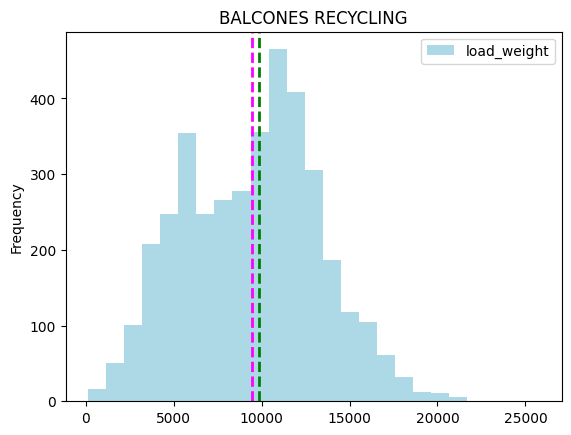

BALCONES RECYCLING clean :
Mean:  9441.002610966058
Median:  9820.0
Mode:  0    11880.0
dtype: float64
Q1:  6260.0
Q3:  12080.0
IQR:  5820.0
Skew:  0.04920024042695909


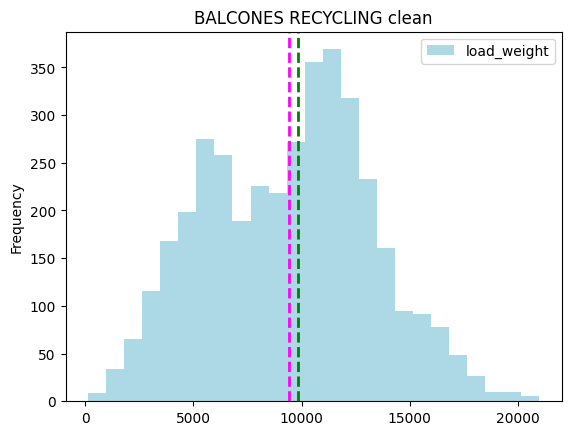

,report_date,load_time,load_type,load_weight,dropoff_site
111,2021-01-02,2021-01-02 12:22:00 UTC,RECYCLING - SINGLE STREAM,8760.0,BALCONES RECYCLING
112,2021-01-02,2021-01-02 12:45:00 UTC,RECYCLING - SINGLE STREAM,8500.0,BALCONES RECYCLING
113,2021-01-02,2021-01-02 11:55:00 UTC,RECYCLING - SINGLE STREAM,5020.0,BALCONES RECYCLING
114,2021-01-02,2021-01-02 11:48:00 UTC,RECYCLING - SINGLE STREAM,4440.0,BALCONES RECYCLING
115,2021-01-02,2021-01-02 09:58:00 UTC,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
...,...,...,...,...,...
26002,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,4540.0,BALCONES RECYCLING
26003,2021-07-07,2021-07-07 10:00:00 UTC,RECYCLING - SINGLE STREAM,8660.0,BALCONES RECYCLING
26004,2021-07-07,2021-07-07 12:00:00 UTC,RECYCLING - SINGLE STREAM,4740.0,BALCONES RECYCLING
26005,2021-07-07,2021-07-07 09:00:00 UTC,RECYCLING - SINGLE STREAM,9200.0,BALCONES RECYCLING


In [51]:
SiteCent("BALCONES RECYCLING")
cleanCent(BRC, "BALCONES RECYCLING")

TDS - MRF

Central Tendency untuk data site TDS - MRF

TDS - MRF with outlier :
Mean:  9872.550881953866
Median:  10330.0
Mode:  0    10360.0
dtype: float64
Q1:  6960.0
Q3:  12185.0
IQR:  5225.0
Skew:  0.14161553035458035


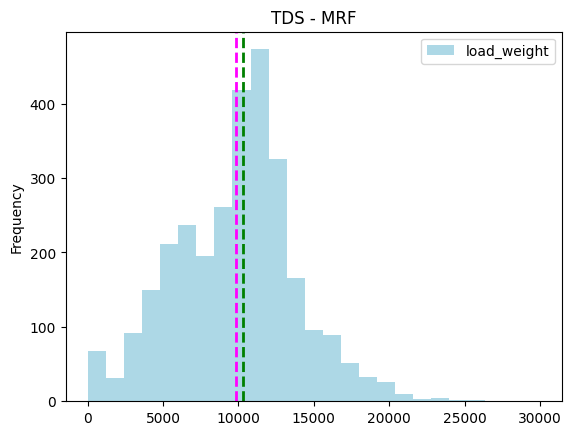

,report_date,load_time,load_type,load_weight,dropoff_site
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
164,2021-01-04,2021-01-04 10:08:00 UTC,RECYCLING - SINGLE STREAM,5820.0,TDS - MRF
165,2021-01-04,2021-01-04 12:43:00 UTC,RECYCLING - SINGLE STREAM,1640.0,TDS - MRF
166,2021-01-04,2021-01-04 12:21:00 UTC,RECYCLING - SINGLE STREAM,5420.0,TDS - MRF
...,...,...,...,...,...
25728,2021-07-06,2021-07-06 10:00:00 UTC,RECYCLING - SINGLE STREAM,9080.0,TDS - MRF
25729,2021-07-06,2021-07-06 09:00:00 UTC,RECYCLING - SINGLE STREAM,12840.0,TDS - MRF
25730,2021-07-06,2021-07-06 02:00:00 UTC,RECYCLING - SINGLE STREAM,10200.0,TDS - MRF
25863,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,5340.0,TDS - MRF


In [52]:
SiteCent("TDS - MRF")

Karena niali skew yang terdapat pada tabel diatas tidak memenuhi -0,5 < skew < 0,5, maka distribusi data nya bisa disebut normal. Untuk menghandling outlier pada data ini akan digunakan z score

In [53]:
TM = dfc.loc[dfc["dropoff_site"] == "TDS - MRF"]
TM['zscore'] = ( TM.load_weight - TM.load_weight.mean() ) / TM.load_weight.std()
TM.head(5)

C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,report_date,load_time,load_type,load_weight,dropoff_site,zscore
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF,-2.339231
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF,-2.290255
164,2021-01-04,2021-01-04 10:08:00 UTC,RECYCLING - SINGLE STREAM,5820.0,TDS - MRF,-0.992390
165,2021-01-04,2021-01-04 12:43:00 UTC,RECYCLING - SINGLE STREAM,1640.0,TDS - MRF,-2.015989
166,2021-01-04,2021-01-04 12:21:00 UTC,RECYCLING - SINGLE STREAM,5420.0,TDS - MRF,-1.090342


Munculkan data yang termasuk outlier

In [54]:
TM[(TM.zscore<-3) | (TM.zscore>3)]

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
397,2021-01-05,2021-01-05 02:00:00 UTC,RECYCLING - SINGLE STREAM,22800.0,TDS - MRF,3.165677
566,2021-01-06,2021-01-06 10:34:00 UTC,GARBAGE COLLECTIONS,23020.0,TDS - MRF,3.219551
2997,2021-01-25,2021-01-25 02:44:00 UTC,GARBAGE COLLECTIONS,26180.0,TDS - MRF,3.993373
6495,2021-02-25,2021-02-25 11:39:00 UTC,GARBAGE COLLECTIONS,27760.0,TDS - MRF,4.380284
14417,2021-04-14,2021-04-14 02:30:00 UTC,GARBAGE COLLECTIONS,29940.0,TDS - MRF,4.914123
16319,2021-04-27,2021-04-27 01:09:00 UTC,GARBAGE COLLECTIONS,25600.0,TDS - MRF,3.851342
19410,2021-05-19,2021-05-19 03:41:00 UTC,GARBAGE COLLECTIONS,23980.0,TDS - MRF,3.454636
19598,2021-05-20,2021-05-20 11:28:00 UTC,GARBAGE COLLECTIONS,23940.0,TDS - MRF,3.444841
20866,2021-05-31,2021-05-31 02:15:00 UTC,RECYCLING - SINGLE STREAM,23320.0,TDS - MRF,3.293015
20870,2021-05-31,2021-05-31 01:01:00 UTC,RECYCLING - SINGLE STREAM,22280.0,TDS - MRF,3.038340


Hapus data yang termasuk outlier dan masukkan tabel yang sudah bersih ke variabel baru

In [55]:
TMC = TM[~(TM.zscore<-3) & ~(TM.zscore>3)]
TMC.head()

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF,-2.339231
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF,-2.290255
164,2021-01-04,2021-01-04 10:08:00 UTC,RECYCLING - SINGLE STREAM,5820.0,TDS - MRF,-0.992390
165,2021-01-04,2021-01-04 12:43:00 UTC,RECYCLING - SINGLE STREAM,1640.0,TDS - MRF,-2.015989
166,2021-01-04,2021-01-04 12:21:00 UTC,RECYCLING - SINGLE STREAM,5420.0,TDS - MRF,-1.090342


In [56]:
TMC

,report_date,load_time,load_type,load_weight,dropoff_site,zscore
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF,-2.339231
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF,-2.290255
164,2021-01-04,2021-01-04 10:08:00 UTC,RECYCLING - SINGLE STREAM,5820.0,TDS - MRF,-0.992390
165,2021-01-04,2021-01-04 12:43:00 UTC,RECYCLING - SINGLE STREAM,1640.0,TDS - MRF,-2.015989
166,2021-01-04,2021-01-04 12:21:00 UTC,RECYCLING - SINGLE STREAM,5420.0,TDS - MRF,-1.090342
...,...,...,...,...,...,...
25728,2021-07-06,2021-07-06 10:00:00 UTC,RECYCLING - SINGLE STREAM,9080.0,TDS - MRF,-0.194080
25729,2021-07-06,2021-07-06 09:00:00 UTC,RECYCLING - SINGLE STREAM,12840.0,TDS - MRF,0.726670
25730,2021-07-06,2021-07-06 02:00:00 UTC,RECYCLING - SINGLE STREAM,10200.0,TDS - MRF,0.080186
25863,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,5340.0,TDS - MRF,-1.109932


Munculkan central tendency data awal dan data yang sudah bersih dari outlier

TDS - MRF with outlier :
Mean:  9872.550881953866
Median:  10330.0
Mode:  0    10360.0
dtype: float64
Q1:  6960.0
Q3:  12185.0
IQR:  5225.0
Skew:  0.14161553035458035


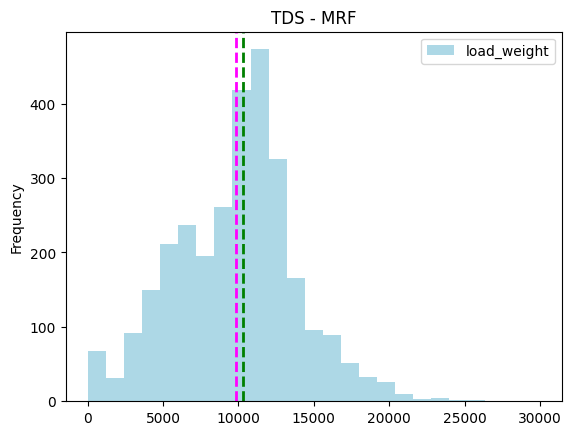

TDS - MRF clean :
Mean:  9805.96252129472
Median:  10300.0
Mode:  0    10360.0
dtype: float64
Q1:  6960.0
Q3:  12160.0
IQR:  5200.0
Skew:  -0.05169709459840085


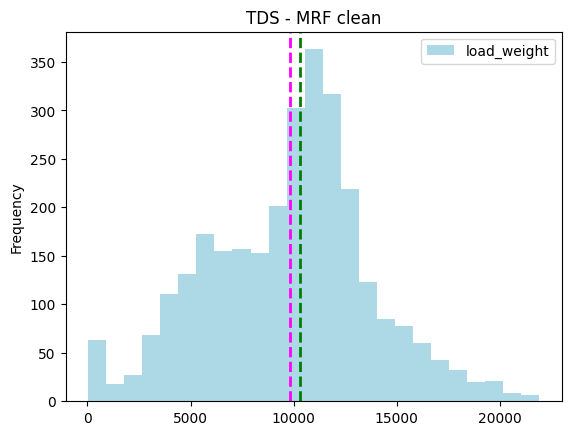

,report_date,load_time,load_type,load_weight,dropoff_site
6,2021-01-02,2021-01-02 12:00:00 UTC,RECYCLING - SINGLE STREAM,320.0,TDS - MRF
7,2021-01-02,2021-01-02 09:02:00 UTC,RECYCLING - SINGLE STREAM,520.0,TDS - MRF
164,2021-01-04,2021-01-04 10:08:00 UTC,RECYCLING - SINGLE STREAM,5820.0,TDS - MRF
165,2021-01-04,2021-01-04 12:43:00 UTC,RECYCLING - SINGLE STREAM,1640.0,TDS - MRF
166,2021-01-04,2021-01-04 12:21:00 UTC,RECYCLING - SINGLE STREAM,5420.0,TDS - MRF
...,...,...,...,...,...
25728,2021-07-06,2021-07-06 10:00:00 UTC,RECYCLING - SINGLE STREAM,9080.0,TDS - MRF
25729,2021-07-06,2021-07-06 09:00:00 UTC,RECYCLING - SINGLE STREAM,12840.0,TDS - MRF
25730,2021-07-06,2021-07-06 02:00:00 UTC,RECYCLING - SINGLE STREAM,10200.0,TDS - MRF
25863,2021-07-07,2021-07-07 02:00:00 UTC,RECYCLING - SINGLE STREAM,5340.0,TDS - MRF


In [57]:
SiteCent("TDS - MRF")
cleanCent(TMC, "TDS - MRF")

HORNSBY BEND

Central Tendency data site HONRSBY BEND

HORNSBY BEND with outlier :
Mean:  6637.111782477341
Median:  6400.0
Mode:  0    5500.0
dtype: float64
Q1:  4620.0
Q3:  8440.0
IQR:  3820.0
Skew:  0.7371055378065222


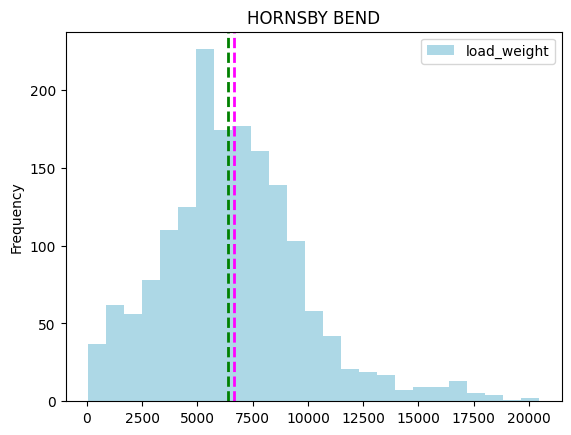

,report_date,load_time,load_type,load_weight,dropoff_site
11,2021-01-02,2021-01-02 05:44:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
12,2021-01-02,2021-01-02 12:04:00 UTC,YARD TRIMMING,18220.0,HORNSBY BEND
13,2021-01-02,2021-01-02 05:45:00 UTC,YARD TRIMMING,7400.0,HORNSBY BEND
14,2021-01-02,2021-01-02 02:05:00 UTC,YARD TRIMMING,17880.0,HORNSBY BEND
15,2021-01-02,2021-01-02 01:02:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
...,...,...,...,...,...
26150,2021-07-09,2021-07-09 06:20:00 UTC,BRUSH,5500.0,HORNSBY BEND
26151,2021-07-09,2021-07-09 03:40:00 UTC,BRUSH,5500.0,HORNSBY BEND
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND


In [58]:
SiteCent("HORNSBY BEND")

Karena niali skew yang terdapat pada tabel diatas memenuhi -0,5 < skew < 0,5, maka distribusi data nya bisa disebut skewed atau tidak normal. Untuk menghandling outlier pada data ini akan digunakan IQR

In [59]:
HB = dfc.loc[dfc["dropoff_site"] == "HORNSBY BEND"]
Q1 = 4620
Q3 = 8440.0
IQR = 3820.0
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1110.0, 14170.0)

Munculkan data yang termasuk outlier

In [60]:
out = HB[(HB['load_weight']>upper_limit) | (HB['load_weight']<lower_limit)]
out

,report_date,load_time,load_type,load_weight,dropoff_site
11,2021-01-02,2021-01-02 05:44:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
12,2021-01-02,2021-01-02 12:04:00 UTC,YARD TRIMMING,18220.0,HORNSBY BEND
14,2021-01-02,2021-01-02 02:05:00 UTC,YARD TRIMMING,17880.0,HORNSBY BEND
15,2021-01-02,2021-01-02 01:02:00 UTC,YARD TRIMMING,17660.0,HORNSBY BEND
225,2021-01-04,2021-01-04 09:57:00 UTC,YARD TRIMMING,14540.0,HORNSBY BEND
226,2021-01-04,2021-01-04 04:59:00 UTC,YARD TRIMMING,17020.0,HORNSBY BEND
227,2021-01-04,2021-01-04 05:39:00 UTC,YARD TRIMMING,18080.0,HORNSBY BEND
229,2021-01-04,2021-01-04 04:55:00 UTC,YARD TRIMMING,15980.0,HORNSBY BEND
230,2021-01-04,2021-01-04 11:56:00 UTC,YARD TRIMMING,16240.0,HORNSBY BEND
232,2021-01-04,2021-01-04 10:27:00 UTC,YARD TRIMMING,17120.0,HORNSBY BEND


Hapus outlier dan masukkan data yang sudah bersih ke dalam variabel baru

In [61]:
HBC = HB[(HB.load_weight<upper_limit) & (HB.load_weight>lower_limit)] 
HBC

,report_date,load_time,load_type,load_weight,dropoff_site
13,2021-01-02,2021-01-02 05:45:00 UTC,YARD TRIMMING,7400.0,HORNSBY BEND
218,2021-01-04,2021-01-04 03:13:00 UTC,BRUSH,3700.0,HORNSBY BEND
219,2021-01-04,2021-01-04 12:01:00 UTC,BRUSH,7140.0,HORNSBY BEND
220,2021-01-04,2021-01-04 03:34:00 UTC,BRUSH,4640.0,HORNSBY BEND
221,2021-01-04,2021-01-04 01:21:00 UTC,BRUSH,7000.0,HORNSBY BEND
...,...,...,...,...,...
26150,2021-07-09,2021-07-09 06:20:00 UTC,BRUSH,5500.0,HORNSBY BEND
26151,2021-07-09,2021-07-09 03:40:00 UTC,BRUSH,5500.0,HORNSBY BEND
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND


Munculkan central tendency data awal dan data yang sudah bersih dari outlier

HORNSBY BEND with outlier :
Mean:  6637.111782477341
Median:  6400.0
Mode:  0    5500.0
dtype: float64
Q1:  4620.0
Q3:  8440.0
IQR:  3820.0
Skew:  0.7371055378065222


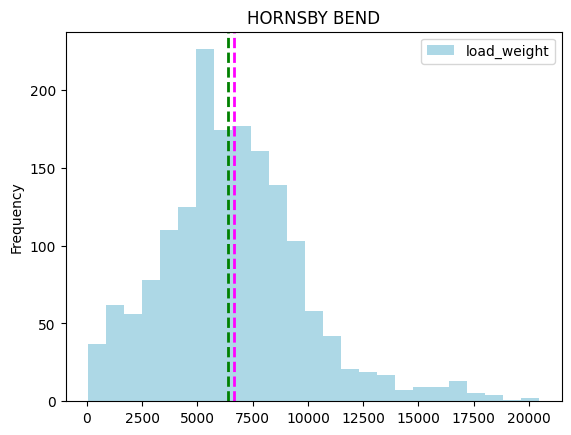

HORNSBY BEND clean :
Mean:  6342.50155569384
Median:  6300.0
Mode:  0    5500.0
dtype: float64
Q1:  4540.0
Q3:  8200.0
IQR:  3660.0
Skew:  0.105130311005145


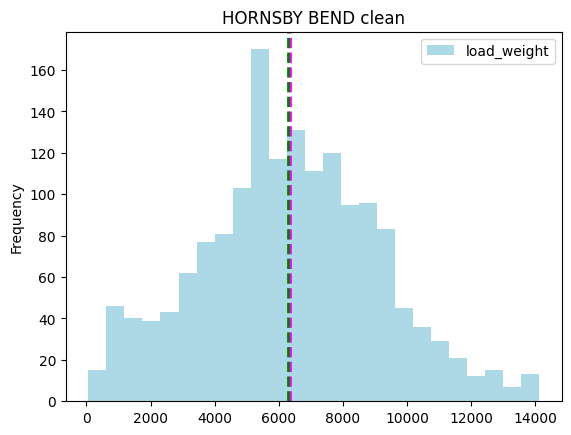

,report_date,load_time,load_type,load_weight,dropoff_site
13,2021-01-02,2021-01-02 05:45:00 UTC,YARD TRIMMING,7400.0,HORNSBY BEND
218,2021-01-04,2021-01-04 03:13:00 UTC,BRUSH,3700.0,HORNSBY BEND
219,2021-01-04,2021-01-04 12:01:00 UTC,BRUSH,7140.0,HORNSBY BEND
220,2021-01-04,2021-01-04 03:34:00 UTC,BRUSH,4640.0,HORNSBY BEND
221,2021-01-04,2021-01-04 01:21:00 UTC,BRUSH,7000.0,HORNSBY BEND
...,...,...,...,...,...
26150,2021-07-09,2021-07-09 06:20:00 UTC,BRUSH,5500.0,HORNSBY BEND
26151,2021-07-09,2021-07-09 03:40:00 UTC,BRUSH,5500.0,HORNSBY BEND
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND


In [62]:
SiteCent("HORNSBY BEND")
cleanCent0(HBC, "HORNSBY BEND")

Dari kelima site yang dianalisa diatas, saya akan mengangkat site TDS LANDFILL untuk dianalisa lebih jauh karena site tersebut menyumbang lebih dari 40% data (40.08%) dari total keseluruhan data

Mencari nilai range, variance, dan std untuk data site TDS LANDFILL

In [63]:
range = TDSC["load_weight"].max() - TDSC["load_weight"].min()  #range
print("nilai max :",TDSC["load_weight"].max())
print("nilai min :",TDSC["load_weight"].min())
print("nilai range : ",range)

nilai max : 35900.0
nilai min : 0.0
nilai range :  35900.0


Dari perhitungan diatas, didapatkan range sebesar 35900 dari nilai max 35900 dan min 0. artinya, rentang data bervariasi dari nilai 0 sampai 35900

In [64]:
var = TDSC["load_weight"].var() #Varians
print("nilai varians : ", var)

nilai varians :  61675925.62144893


In [65]:
std = TDSC["load_weight"].std() #Standar deviasi
print("nilai standar deviasi : ", std)

nilai standar deviasi :  7853.402168579483


Berdasarkan standar deviasi yang lebih kecil dari mean, rentang persebaran data yang ada dalam data tersebut banyak yang mendekati nilai rata - rata

```
Untuk pembuatan site baru, saya akan menyarankan pemerintah membuat site dengan kapasitas yang memiliki range 0 - 35900 dengan confidence interval 90% berdasarkan analisa tabel data site TDS LANDFILL. saya memilih menganalisa hanya TDS LANDFILL karena pada site tersebut saja, jumlah data yang masuk melebihi 40% dari data total dan itu bisa dijadikan patokan untuk pembuatan site baru.
```

Ambil data total load weight per hari untuk data tersebut sebagai populasi

In [66]:
TDSC1 = TDSC[['report_date','load_weight']].groupby('report_date').sum()
TDSC1

,load_weight
report_date,
2021-01-02,1009340.0
2021-01-04,1739780.0
2021-01-05,1284900.0
2021-01-06,1315020.0
2021-01-07,1246240.0
...,...
2021-07-05,1231400.0
2021-07-06,1194860.0
2021-07-07,1036970.0


Buat histogram nya

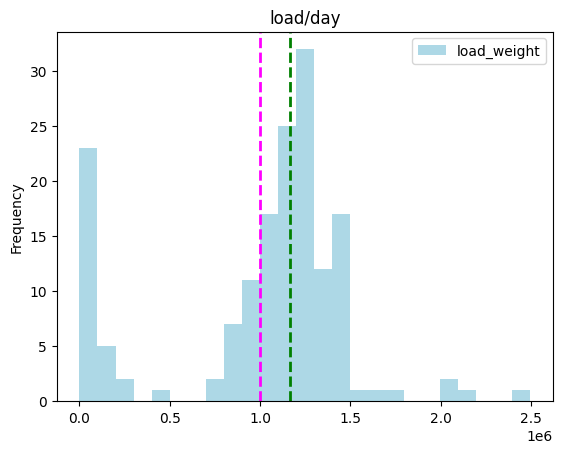

In [67]:
TDSC1.plot.hist(title='load/day', color='lightblue', bins=25)  
plt.axvline(TDSC1["load_weight"].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(TDSC1["load_weight"].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Buat histogram sampel


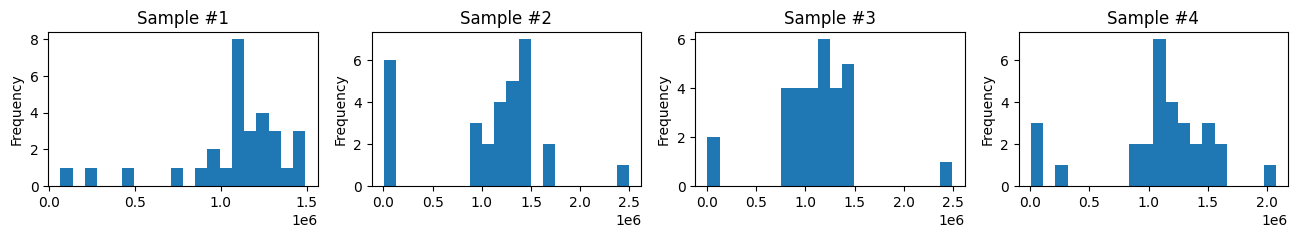

In [68]:
fig,ax = plt.subplots(ncols=4, figsize = (16,2))
i = 0
while i < 4 :
  TDSC1.load_weight.sample(30).plot(kind='hist',bins=20,ax=ax[i])
  ax[i].set_title('Sample #{}'.format(i+1))
  i=i+1

Dari grafik populasi dan 4 sampel diatas, bisa dilihat bahwa data load TDS LANDFILL per hari sangat mirip dan sampel nya bisa merepresentasikan populasi.

```
untuk analisa uji hipotesis, topik yang akan diangkat adalah :
H0 = Load januari total sama dengan load februari
H1 = Load januari total berbeda dengan total load februari
maka dari itu, metode single sample two tailed akan digunakan untuk melihat hasil analisa uji hipotesis
```


Hitung P-value dan t-stats

In [69]:
t_stat,p_val = stats.ttest_1samp(TDSC1.load_weight, 2000)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 1.2933960811202932e-56
t-statistics: 24.629547080119547


Buat plot nya

C:\Users\Omen\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


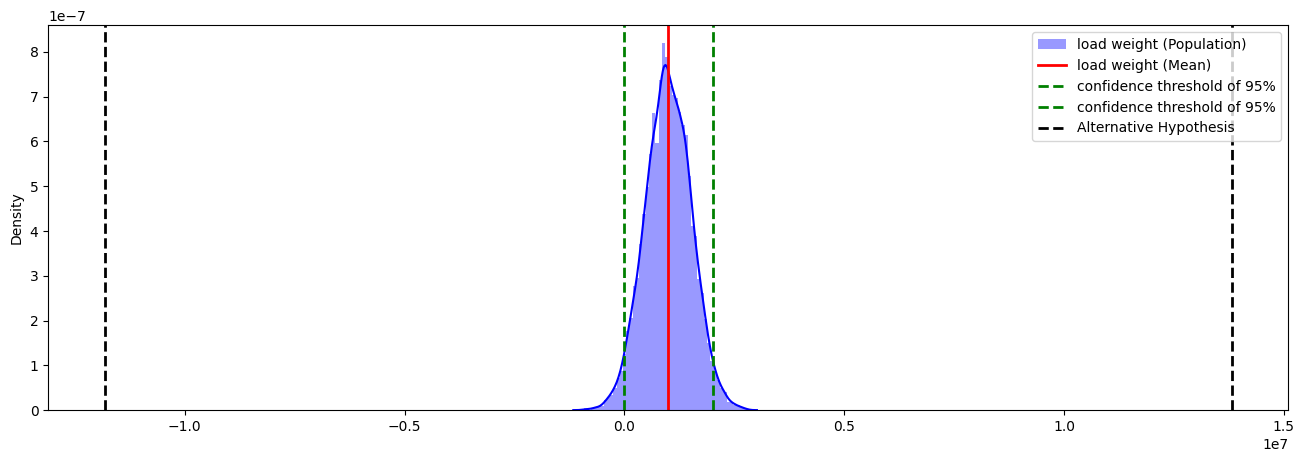

In [70]:
TDSC2 = np.random.normal(TDSC1.load_weight.mean(), TDSC1.load_weight.std(), 10000)

ci = stats.norm.interval(0.95, TDSC1.load_weight.mean(), TDSC1.load_weight.std())

plt.figure(figsize=(16,5))
sns.distplot(TDSC2, label='load weight (Population)', color='blue')
plt.axvline(TDSC1.load_weight.mean(), color='red', linewidth=2, label='load weight (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(TDSC2.mean() + t_stat*TDSC2.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(TDSC2.mean() - t_stat*TDSC2.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

Berdasarkan p valuenya yang lebih kecil dari Critical value yaitu 0.5% maka memiliki cukup bukti untuk menolak hipotesis awal yaitu H0. maka dari itu hipotesis H0(Total load januari sama dengan total load februari) ditolak dan hipotesis H1 (Total load januari total berbeda dengan total load februari). Dari grafik juga bisa dilihat bahwa garis putus putus hitam (alternative hypothesis) berada diluar lingkup mean(garis merah) dan CI (garis putus-putus hijau), sehingga H0 ditolak, dan H1 diterima.

```
Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!

1. Teknik apa yang kamu pilih untuk handling outlier? jelaskan alasannya!
    untuk handling outlier, saya menggunakan teknik z score jika nilai skewness data tersebut bernilai -0.5 < skew < 0.5 yang berarti distribusi data normal. Jika nilai skewness data tersebut diluar itu, saya menggunakan teknik Tukey's Rule yaitu dengan IQR.

2. Apa konsep dibalik confidence interval sehingga kita dapat menggunakannya untuk menyelesaikan langkah pada nomor 7?
    Confidence interval yang dipilih akan menjadi acuan untuk kapasitas pembuatan site baru.

3. Jelaskan jenis uji hipotesis apa yang kamu terapkan dan mengapa?
    Uji hipotesis yang saya terapkan adalah single sample two tailed karena saya hanya menggunakan satu sampel dengan hipotesis yang arah nya tidak ditentukan.

```

<h2>CALCULUS</h2>

Buat tabel yang di-group-by berdasarkan report_date dan setelah itu report_date diurutkan dari tanggal terkecil hingga terbesar

In [71]:
A = dfc[['report_date','load_weight']].groupby('report_date').sum().sort_values(by='report_date')
A

,load_weight
report_date,
2021-01-01,45200.0
2021-01-02,2204030.0
2021-01-04,2920260.0
2021-01-05,2399840.0
2021-01-06,2453050.0
...,...
2021-07-05,1897290.0
2021-07-06,1989440.0
2021-07-07,1654780.0


tambahkan kolom cumulative yang berisi total load_weight yang masuk dari hari ke hari secara kumulatif

In [72]:
A['cumulative']=A['load_weight'].cumsum()
A

,load_weight,cumulative
report_date,,
2021-01-01,45200.0,4.520000e+04
2021-01-02,2204030.0,2.249230e+06
2021-01-04,2920260.0,5.169490e+06
2021-01-05,2399840.0,7.569330e+06
2021-01-06,2453050.0,1.002238e+07
...,...,...
2021-07-05,1897290.0,3.125851e+08
2021-07-06,1989440.0,3.145746e+08
2021-07-07,1654780.0,3.162293e+08


In [73]:
x = A.reset_index().index
x

RangeIndex(start=0, stop=166, step=1)

Cari nilai V

In [74]:
V = np.diff(A['cumulative']) / np.diff(x)

Cari nilai load kumulatif untuk esok hari (10 Juli 2021)

In [75]:
Wt = A.iloc[-1]['cumulative'] + V[-1]*1
Wt

318124968.5394

kurangi dengan kumulatif hari ini 

In [76]:
Wtm = 318124968-317948100
print("perkiraan load weight 10 Juli 2021 : ", Wtm, "Kg")

perkiraan load weight 10 Juli 2021 :  176868 Kg


```
Jawab pertanyaan berikut untuk mengasah pemahaman konsepmu!

1. Untuk menghitung turunan pertama dapat digunakan metode simbolik dan numerik, untuk kasus ini, teknik apa yang kamu gunakan?
    Numerik

2. Apakah kamu membutuhkan fungsi matematis untuk menghitung turunannya? (ya/tidak) berikan alasanmu!
    Ya 
    
3. Berapa load weight yang kamu perkirakan di hari esok (10 Juli 2021)?
    W tanggal 10 Juli 2021 adalah 176868 Kg
```